In [6]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.data import boston_housing_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Carregando dados
X,y = boston_housing_data()

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

# Lista de parâmetros
min_samples_leaf = list(range(1, 11)) + list(range(15, 105, 5))


# DataFrame para armazenar resultados
results = pd.DataFrame(columns = ['vies^2', 'variancia', 'mse', 'min_sample_leafs'])

# Simulações
for msl in min_samples_leaf:
    tree = DecisionTreeRegressor(min_samples_leaf = msl)
    
    mse, vies, variancia = bias_variance_decomp(tree,
                                                X_train,
                                                y_train,
                                                X_test,
                                                y_test,
                                                loss = 'mse',
                                                random_seed = 123)
    
    results.loc[msl, 'vies^2'] = vies
    results.loc[msl, 'variancia'] = variancia
    results.loc[msl, 'mse'] = mse
    results.loc[msl, 'min_sample_leafs'] = msl

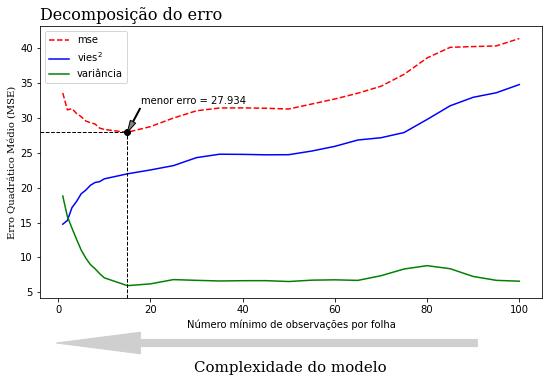

In [63]:
# Importando módulo para adicionar setas à figura
from matplotlib.patches import Arrow

# Criando figura e eixo
fig, ax = plt.subplots(figsize = (9, 5))

# Especificações da fonte
fontdict = {'family': 'serif'}

# Plotando
ax.plot(results['mse'], color = 'red', ls = '--', label = 'mse')
ax.plot(results['vies^2'], color = 'blue', label = r'vies$^2$')
ax.plot(results['variancia'], color = 'green', label = 'variância')

# Linhas verticais
y = results['mse'].min()
x = int(results[results['mse'] == y]['min_sample_leafs'])

ax.axvline(x = x, ymax = .62, ls = '--', lw = 1, c = 'black')
ax.axhline(y = y, xmax = .18, ls = '--', lw = 1, c = 'black')

# Ponto
ax.plot(x, y, marker = 'o', color = 'black')

# Anotação
ax.annotate(f'menor erro = {round(y, 3)}', xy = (x,y), xytext = (x+3, y+4), arrowprops = dict(facecolor = '#828385',
                                                                             edgecolor = 'black',
                                                                             width = 1,
                                                                             headwidth = 6))

# Definindo título e nome dos eixos
ax.set_title('Decomposição do erro', fontdict = fontdict ,fontsize = 16, loc = 'left')
ax.set_ylabel('Erro Quadrático Médio (MSE)', fontdict = fontdict)
ax.set_xlabel('Número mínimo de observações por folha')

# Adicionando elementos à figura
seta = Arrow(x = .8, y = 0, dx = -.65, dy = 0, width = .1, color = '#CFCFCF')
fig.add_artist(seta)
fig.text(x = .362, y = -.08, s = 'Complexidade do modelo', fontdict = {'fontsize': 15,
                                                                     'family': 'serif'})
ax.legend()


plt.show()

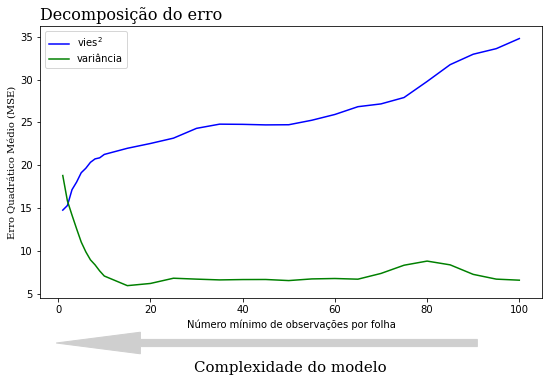

In [68]:

# Criando figura e eixo
fig, ax = plt.subplots(figsize = (9, 5))

# Especificações da fonte
fontdict = {'family': 'serif'}

# Plotando
#ax.plot(results['mse'], color = 'red', ls = '--', label = 'mse')
ax.plot(results['vies^2'], color = 'blue', label = r'vies$^2$')
ax.plot(results['variancia'], color = 'green', label = 'variância')

# Linhas verticais
y = results['mse'].min()
x = int(results[results['mse'] == y]['min_sample_leafs'])

#ax.axvline(x = x, ymax = .62, ls = '--', lw = 1, c = 'black')
#ax.axhline(y = y, xmax = .18, ls = '--', lw = 1, c = 'black')

# Ponto
#ax.plot(x, y, marker = 'o', color = 'black')

# Anotação
#ax.annotate(f'menor erro = {round(y, 3)}', xy = (x,y), xytext = (x+3, y+4), arrowprops = dict(facecolor = '#828385',
#                                                                             edgecolor = 'black',
#                                                                             width = 1,
#                                                                            headwidth = 6))

# Definindo título e nome dos eixos
ax.set_title('Decomposição do erro', fontdict = fontdict ,fontsize = 16, loc = 'left')
ax.set_ylabel('Erro Quadrático Médio (MSE)', fontdict = fontdict)
ax.set_xlabel('Número mínimo de observações por folha')

# Adicionando elementos à figura
seta = Arrow(x = .8, y = 0, dx = -.65, dy = 0, width = .1, color = '#CFCFCF')
fig.add_artist(seta)
fig.text(x = .362, y = -.08, s = 'Complexidade do modelo', fontdict = {'fontsize': 15,
                                                                     'family': 'serif'})
ax.legend()


plt.show()

In [64]:
fig.savefig('vies-variancia.png', bbox_inches = 'tight')